In [1]:
from utils.models import *

In [2]:
wti = load('data/WTI.csv').pct_change().dropna()
c1 = clean_series('contract_1', wti)
vix = load('data/VIX.csv')
vix_shock = calc_shock('VIX', vix)

In [3]:
window = 36 # number of months for measurement sample (lags mean only 24 datapoints available for each sample)
conf_int = .1 # confidence interval (2-tailed, Student's t)
kf, confs = KF(window=window, conf_int=conf_int).run('contract_1', 'VIX', c1.join(vix_shock).dropna())

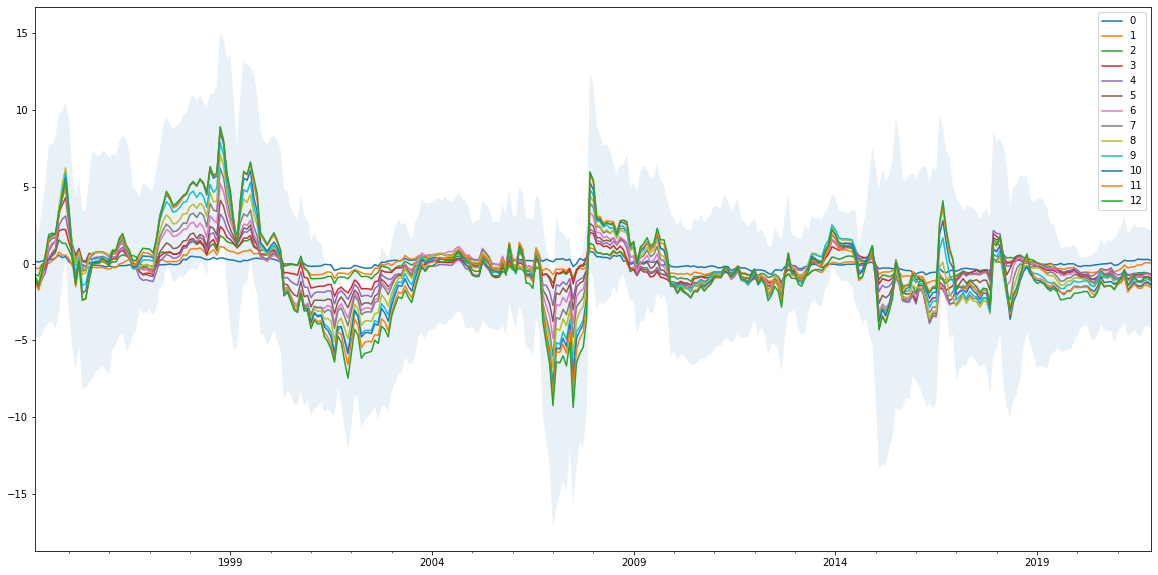

In [4]:
kf.plot(figsize=(20,10))
plt.fill_between(confs.index, confs['lower'], confs['upper'], alpha=0.1)

In [5]:
confs[confs['lower'] > 0] # significant upward movements

,lower,upper
1994-12-01,0.410597,10.414221
1998-04-01,0.054318,10.977190
1998-07-01,1.588021,11.023640
1998-08-01,0.336603,11.052515
1998-09-01,0.246873,11.554958
1998-10-01,2.709531,15.061959
1998-11-01,1.322396,14.644636
1999-07-01,0.424492,12.780032


In [6]:
confs[confs['upper'] < 0] # significant downward movements

,lower,upper
2001-06-01,-9.414765,-0.738309
2001-07-01,-9.757913,-1.416895
2001-08-01,-9.844896,-2.983683
2001-09-01,-8.022303,-1.400445
2001-10-01,-9.153039,-1.095376
2001-11-01,-10.741855,-1.970301
2001-12-01,-12.018754,-2.882799
2002-01-01,-10.620970,-1.135427
2002-02-01,-8.493034,-0.059824
2002-03-01,-8.812498,-0.502465


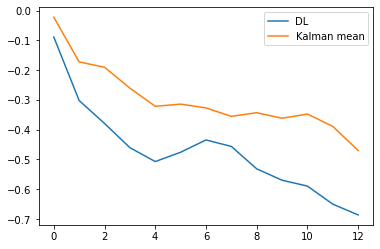

In [7]:
plt.plot(np.cumsum(DL('contract_1', 'VIX', c1.join(vix_shock).dropna().iloc[window:]).model.params[1:]), label='DL')
plt.plot(kf.mean(), label='Kalman mean')
plt.legend()

In [8]:
gpr = load('data/GPRGlobal.csv')
gpr_shock = calc_shock('GPRI', gpr)

In [9]:
kf2, confs2 = KF(window=window, conf_int=conf_int).run('contract_1', 'GPRI', c1.join(gpr_shock).dropna())

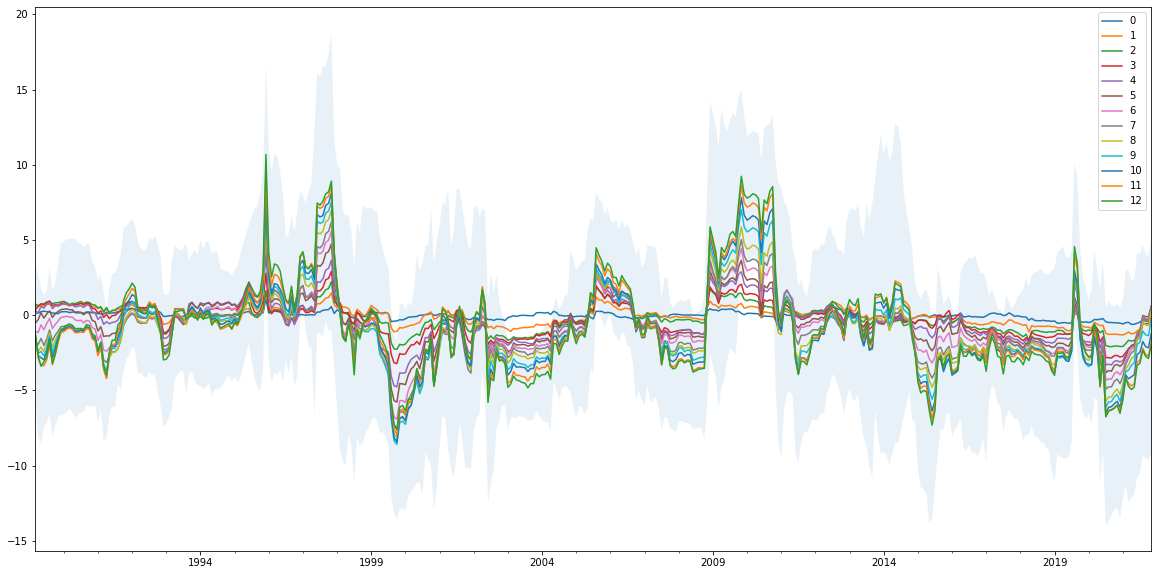

In [10]:
kf2.plot(figsize=(20, 10))
plt.fill_between(confs2.index, confs2['lower'], confs2['upper'], alpha=0.1)

In [11]:
confs2[confs2['lower'] > 0]

,lower,upper
1995-12-01,4.796145,16.571463
1997-01-01,0.440853,8.006702
2005-08-01,0.794266,8.180757
2005-09-01,0.231908,7.718917
2006-01-01,0.142871,6.346474
2009-10-01,0.206515,14.536589
2009-11-01,3.538886,14.936052
2009-12-01,2.791180,13.255683
2010-01-01,3.670077,11.912183
2010-02-01,3.708019,12.059164


In [12]:
confs2[confs2['upper'] < 0]

,lower,upper
1999-09-01,-13.182496,-1.282122
1999-10-01,-13.555369,-1.692002
2002-12-01,-6.033861,-0.456753
2003-01-01,-7.670379,-1.938598
2003-02-01,-6.837901,-2.291955
2003-03-01,-6.753910,-1.344928
2003-04-01,-6.885102,-1.736808
2003-05-01,-6.665577,-2.055843
2003-06-01,-6.783335,-2.166336
2003-07-01,-6.783431,-2.247306


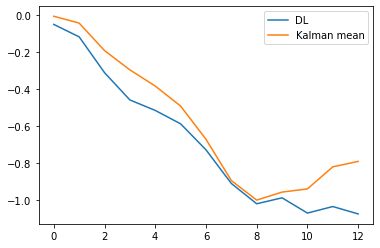

In [13]:
plt.plot(np.cumsum(DL('contract_1', 'GPRI', c1.join(gpr_shock).dropna().iloc[window:]).model.params[1:]), label='DL')
plt.plot(kf2.mean(), label='Kalman mean')
plt.legend()